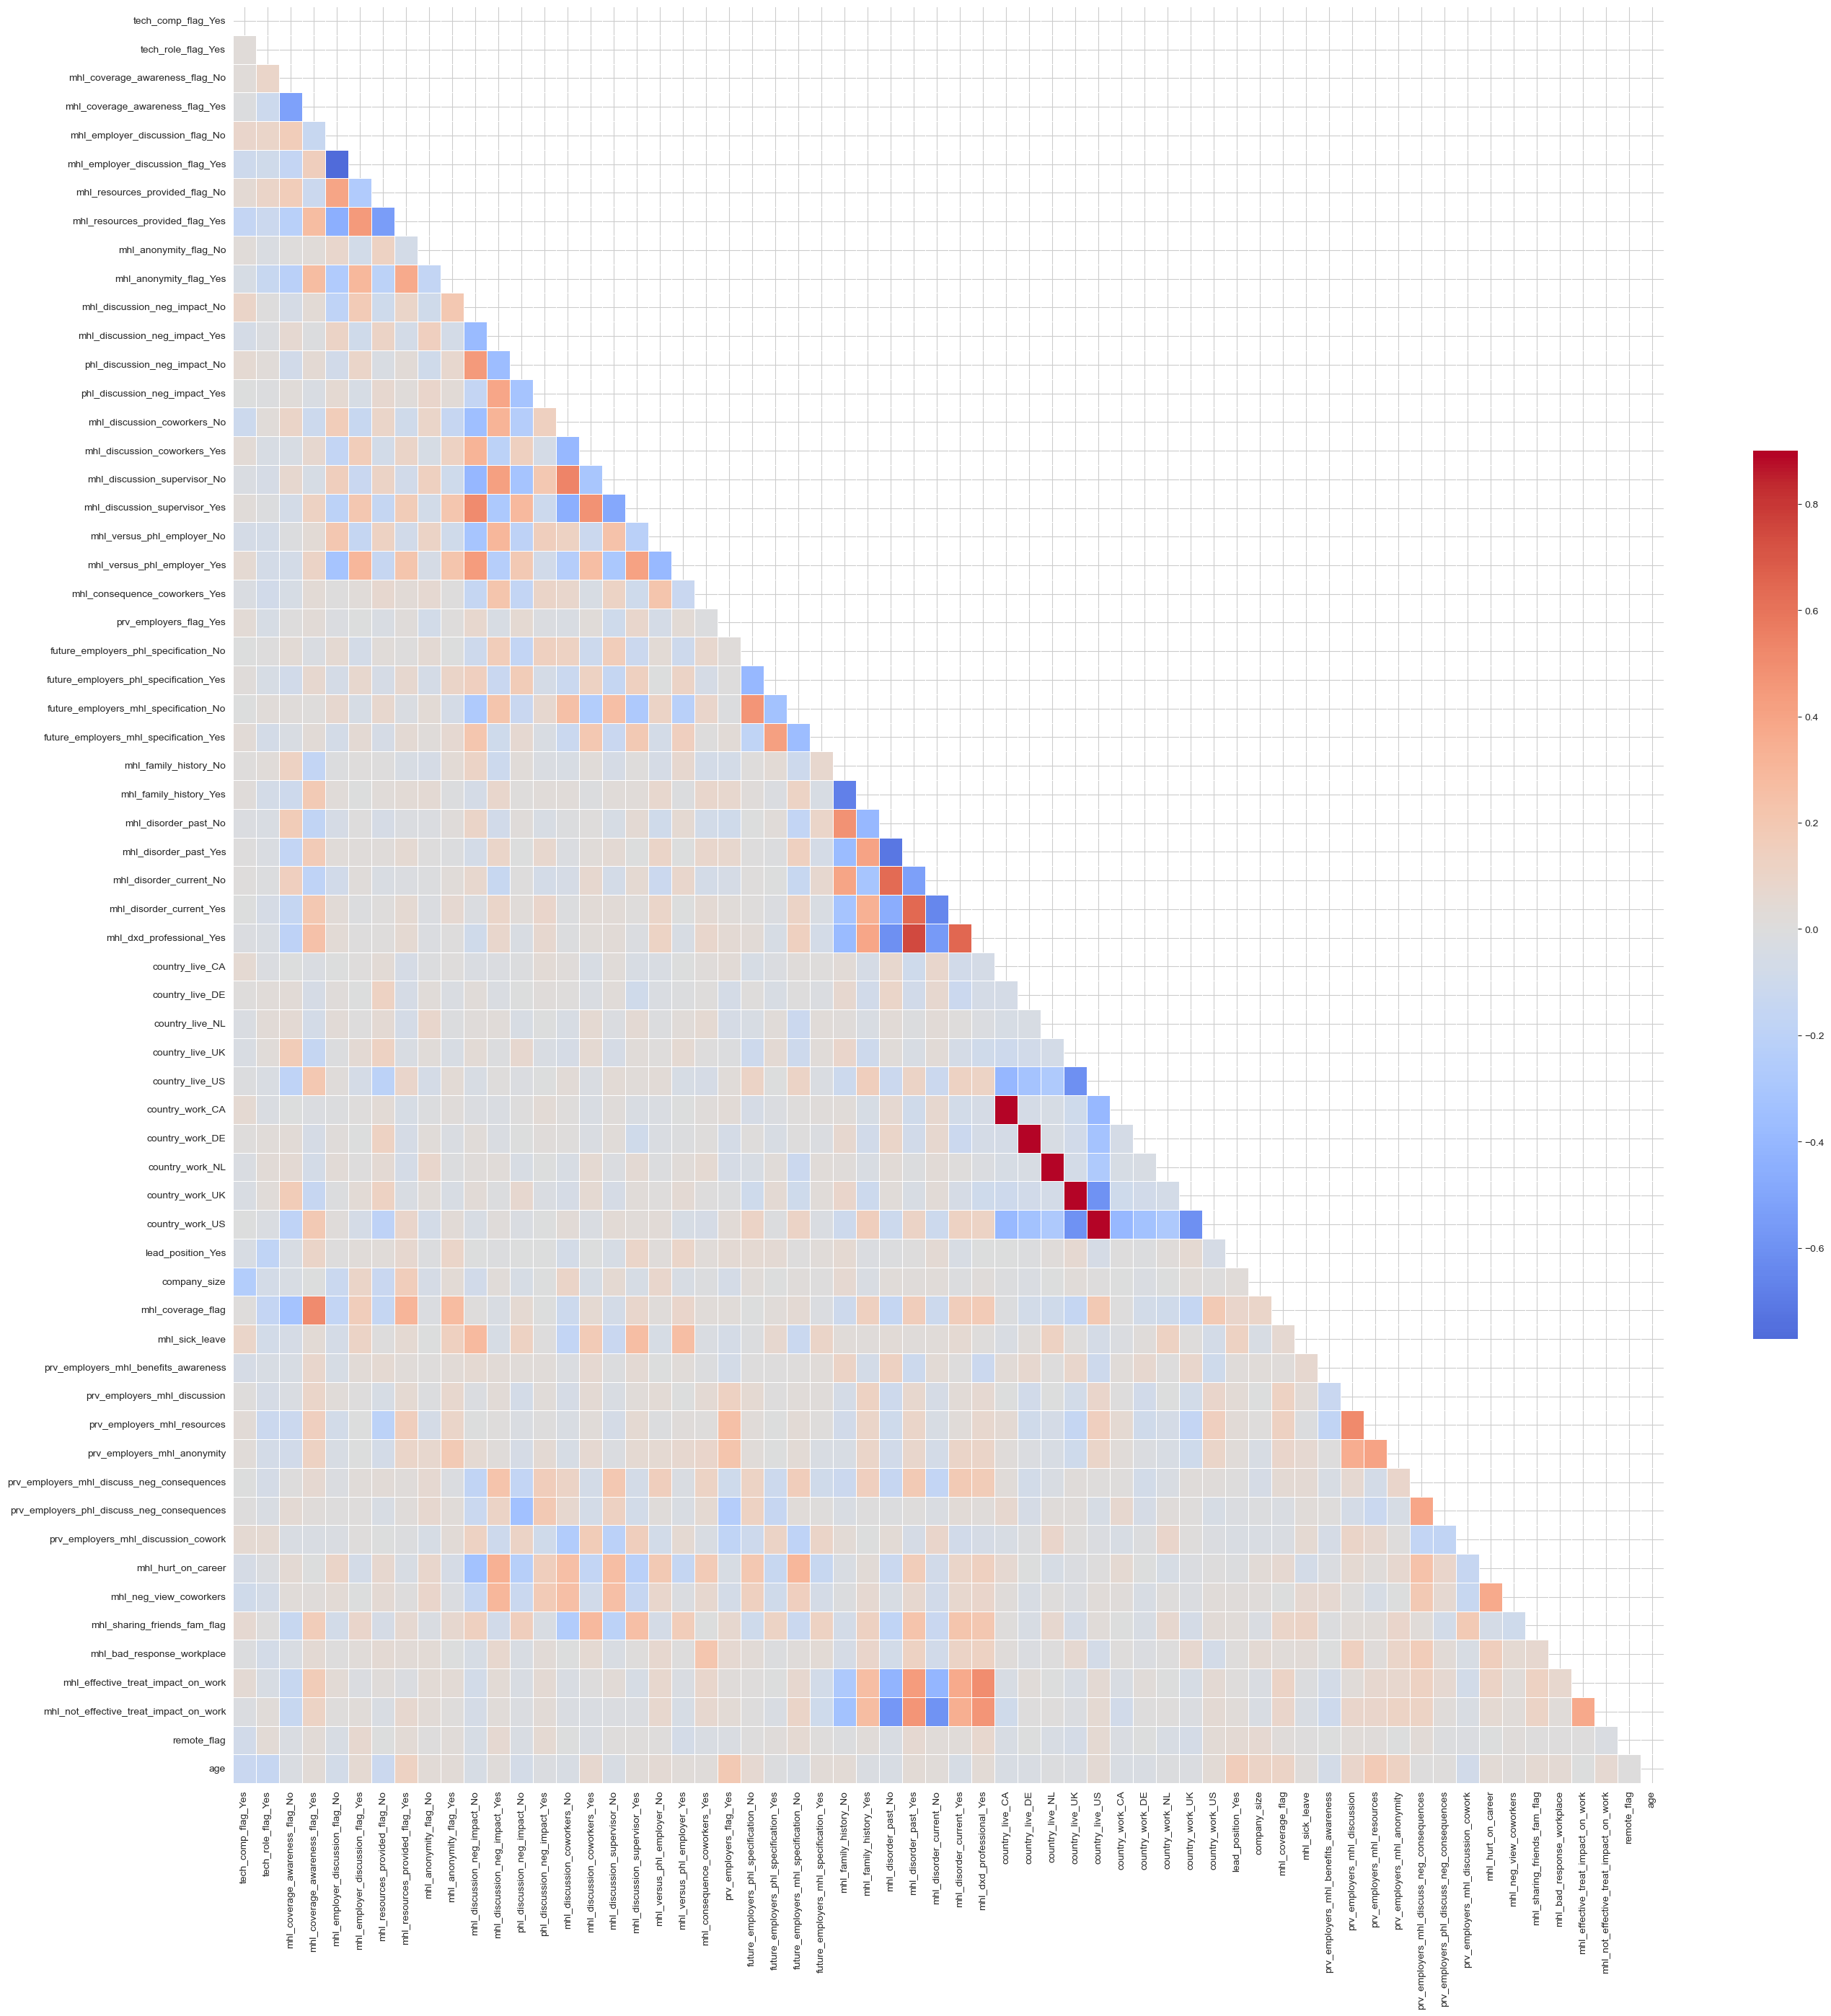

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the encoded dataframe from pickle
encoded_df = pd.read_pickle('encoded_data/encoded_data.pkl')

corr = encoded_df.corr(method ='spearman')
mask_1 = np.zeros_like(corr, dtype=bool)
mask_1[np.triu_indices_from(mask_1)] = True
fig, ax = plt.subplots(figsize=(32, 32))
sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(corr, mask=mask_1, cmap="coolwarm", vmax=.9, center=0, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [2]:
correlations = encoded_df.corr().unstack().sort_values(ascending=False) # Building correlation matrix
correlations = pd.DataFrame(correlations).reset_index() # Converting to dataframe
correlations.columns = ['V1', 'V2', 'correlation'] # Labeling the columns for easier processing
correlations.query("V1 == 'mhl_dxd_professional_Yes' & V2 != 'mhl_dxd_professional_Yes'").nlargest(10,columns="correlation") # Filtering by variable treatment

,V1,V2,correlation
72,mhl_dxd_professional_Yes,mhl_disorder_past_Yes,0.744301
75,mhl_dxd_professional_Yes,mhl_disorder_current_Yes,0.646473
83,mhl_dxd_professional_Yes,mhl_effective_treat_impact_on_work,0.530536
124,mhl_dxd_professional_Yes,mhl_family_history_Yes,0.386589
132,mhl_dxd_professional_Yes,mhl_not_effective_treat_impact_on_work,0.361924
190,mhl_dxd_professional_Yes,mhl_coverage_awareness_flag_Yes,0.243186
255,mhl_dxd_professional_Yes,mhl_sharing_friends_fam_flag,0.193853
275,mhl_dxd_professional_Yes,mhl_coverage_flag,0.179180
291,mhl_dxd_professional_Yes,prv_employers_mhl_discuss_neg_consequences,0.172937
387,mhl_dxd_professional_Yes,future_employers_mhl_specification_No,0.138303


ANOVA

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Define V1 as the target variable (which should be a 1D array)
V1 = encoded_df['mhl_dxd_professional_Yes']

# Define V2 as the feature matrix, dropping the target variable
V2 = encoded_df.drop(["mhl_dxd_professional_Yes"], axis=1)

# Flatten V1 to 1D array (for target variable)
V1 = V1.values.ravel()  # This flattens V1 to be a 1D array

# Initialize SelectKBest with ANOVA F-value as the score function and k=2
selector = SelectKBest(score_func=f_classif, k=2)

# Fit and transform the data
V1_new = selector.fit_transform(V2, V1)

# Display the scores and p-values of the features
feature_scores = pd.DataFrame({
    'features': V2.columns,
    'Scores': selector.scores_,
    'p-values': selector.pvalues_
}).sort_values(by="Scores", ascending=False).nlargest(n=10, columns="Scores")

print(feature_scores)


                                  features       Scores       p-values
29                   mhl_disorder_past_Yes  1222.197363  1.032268e-174
31                mhl_disorder_current_Yes   706.509738  9.184639e-118
28                    mhl_disorder_past_No   573.879196  2.808062e-100
30                 mhl_disorder_current_No   441.546708   2.841664e-81
57      mhl_effective_treat_impact_on_work   385.460485   1.123910e-72
27                  mhl_family_history_Yes   172.900267   1.688908e-36
26                   mhl_family_history_No   167.433319   1.760281e-35
58  mhl_not_effective_treat_impact_on_work   148.321846   6.986251e-32
3          mhl_coverage_awareness_flag_Yes    61.850825   9.707860e-15
2           mhl_coverage_awareness_flag_No    39.156987   5.827041e-10


In [5]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import pandas as pd

# Define y (target variable)
V2 = encoded_df['mhl_dxd_professional_Yes']

# Define X (features) by dropping the target column
V1 = encoded_df.drop(['mhl_dxd_professional_Yes'], axis=1)

# Initialize SelectKBest with mutual_info_classif and select top 15 features
selector = SelectKBest(score_func=mutual_info_classif, k=15)

# Fit the selector to the data
V1_new = selector.fit_transform(V1, V2)

# Create a DataFrame to display the features, scores, and sorted results
feature_scores = pd.DataFrame({
    'features': V1.columns.values,  # Feature names
    'Scores': selector.scores_  # Mutual information scores
})

# Sort the features by Scores in descending order and show the top 15 features
feature_scores_sorted = feature_scores.sort_values(by="Scores", ascending=False).nlargest(n=15, columns="Scores")

# Display the sorted table
print(feature_scores_sorted)


                                      features    Scores
29                       mhl_disorder_past_Yes  0.329785
57          mhl_effective_treat_impact_on_work  0.304910
58      mhl_not_effective_treat_impact_on_work  0.268218
31                    mhl_disorder_current_Yes  0.222072
28                        mhl_disorder_past_No  0.205373
30                     mhl_disorder_current_No  0.166319
26                       mhl_family_history_No  0.070989
27                      mhl_family_history_Yes  0.062000
55                mhl_sharing_friends_fam_flag  0.039360
37                             country_work_CA  0.034610
46        prv_employers_mhl_benefits_awareness  0.033069
16                mhl_discussion_supervisor_No  0.031804
50  prv_employers_mhl_discuss_neg_consequences  0.031773
51  prv_employers_phl_discuss_neg_consequences  0.030203
44                           mhl_coverage_flag  0.029513


In [7]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Define target and features
target_col = "mhl_dxd_professional_Yes"
Y = encoded_df[target_col]
X = encoded_df.drop(columns=[target_col])

# Initialize and apply selector
selector = SelectKBest(score_func=f_classif, k='all')  # Use 'all' to get scores for all features
selector.fit(X, Y)

# Create a DataFrame with scores and p-values
scores_df = pd.DataFrame({
    'features': X.columns,
    'Scores': selector.scores_,
    'p-values': selector.pvalues_
})

# Show top 10 features by ANOVA F-value score
top_features = scores_df.sort_values(by="Scores", ascending=False).head(10)
top_features

,features,Scores,p-values
29,mhl_disorder_past_Yes,1222.197363,1.032268e-174
31,mhl_disorder_current_Yes,706.509738,9.184639e-118
28,mhl_disorder_past_No,573.879196,2.808062e-100
30,mhl_disorder_current_No,441.546708,2.841664e-81
57,mhl_effective_treat_impact_on_work,385.460485,1.123910e-72
27,mhl_family_history_Yes,172.900267,1.688908e-36
26,mhl_family_history_No,167.433319,1.760281e-35
58,mhl_not_effective_treat_impact_on_work,148.321846,6.986251e-32
3,mhl_coverage_awareness_flag_Yes,61.850825,9.707860e-15
2,mhl_coverage_awareness_flag_No,39.156987,5.827041e-10



Chi Square Test

In [9]:
from sklearn.feature_selection import SelectKBest, chi2

# Assign X,y to target and features
y = encoded_df.mhl_dxd_professional_Yes
X = encoded_df.drop(['mhl_dxd_professional_Yes'],axis=1)

# Initiate Chi Square TEst
selector = SelectKBest(chi2, k=8)
selector.fit(X,y)
X_new = selector.transform(X)

# Create data frame showcasing the results
chi_square_test_result = pd.DataFrame({
    'features': X.columns.values,
     'Scores': selector.scores_,
     'p-values': selector.pvalues_
     }).sort_values(by="Scores").nlargest(8,columns="Scores")
chi_square_test_result

,features,Scores,p-values
29,mhl_disorder_past_Yes,259.264368,2.482373e-58
57,mhl_effective_treat_impact_on_work,250.535198,1.985008e-56
28,mhl_disorder_past_No,248.282780,6.149137e-56
31,mhl_disorder_current_Yes,240.308050,3.369279e-54
30,mhl_disorder_current_No,192.967090,7.156574e-44
26,mhl_family_history_No,96.263375,1.005734e-22
58,mhl_not_effective_treat_impact_on_work,80.214525,3.358891e-19
27,mhl_family_history_Yes,76.070720,2.736855e-18


Mutual information

In [10]:
# Create list of all selected features
selected_features = chi_square_test_result.features.to_list()

# Add target variable to list
selected_features.append("mhl_dxd_professional_Yes")

# Create new dataframe with all selected features by subsetting the encoded dataframe
selected_features_df = encoded_df[selected_features]
selected_features_df.head()

,mhl_disorder_past_Yes,mhl_effective_treat_impact_on_work,mhl_disorder_past_No,mhl_disorder_current_Yes,mhl_disorder_current_No,mhl_family_history_No,mhl_not_effective_treat_impact_on_work,mhl_family_history_Yes,mhl_dxd_professional_Yes
0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
1,1.0,3.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0
2,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,1.0,4.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0
4,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0


Cumulative variance explained by 6 PCs: 92.0279%


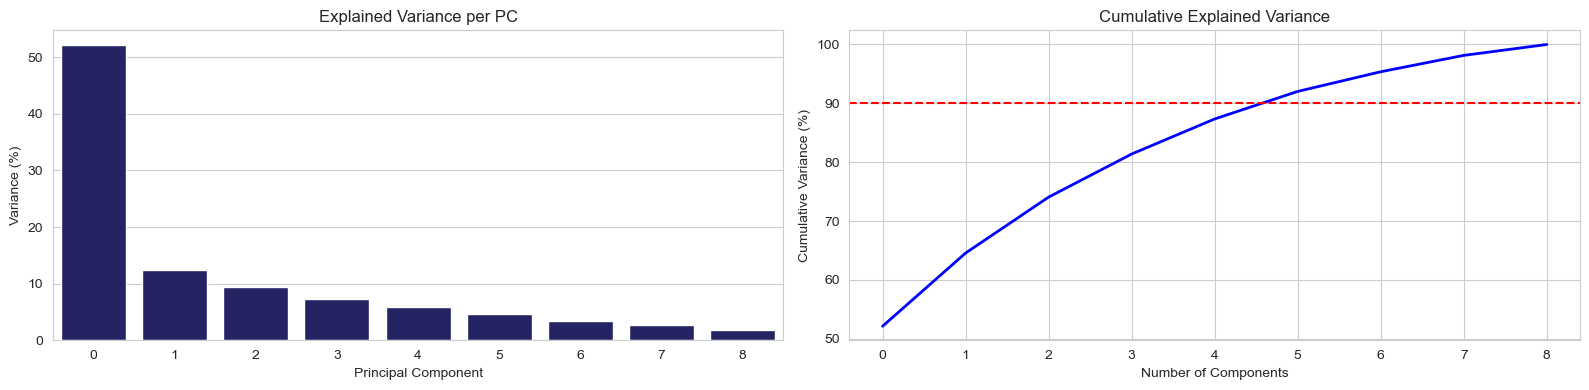

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(selected_features_df)

# Apply PCA without limiting components first
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Calculate explained variance
var_exp = pca.explained_variance_ratio_ * 100
cum_var_exp = np.cumsum(var_exp)

# Automatically select number of components to retain 90% variance
threshold = 90
optimal_components = np.argmax(cum_var_exp >= threshold) + 1
print(f"Cumulative variance explained by {optimal_components} PCs: {round(cum_var_exp[optimal_components - 1], 4)}%")

# Redo PCA with optimal number of components
pca_opt = PCA(n_components=optimal_components)
X_reduced = pca_opt.fit_transform(X_std)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(x=np.arange(len(var_exp)), y=var_exp, ax=ax[0], color='midnightblue')
ax[0].set_title("Explained Variance per PC")
ax[0].set_xlabel("Principal Component")
ax[0].set_ylabel("Variance (%)")

sns.lineplot(x=np.arange(len(cum_var_exp)), y=cum_var_exp, ax=ax[1], color='blue', linewidth=2)
ax[1].axhline(y=threshold, color='red', linestyle='--')
ax[1].set_title("Cumulative Explained Variance")
ax[1].set_xlabel("Number of Components")
ax[1].set_ylabel("Cumulative Variance (%)")
plt.tight_layout()
plt.show()

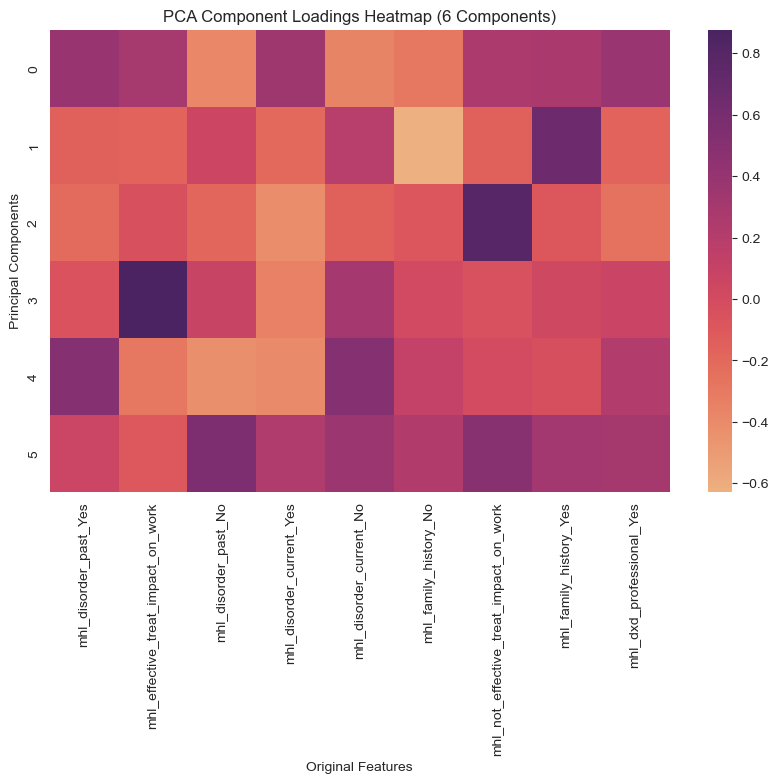

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Apply PCA with 6 components (since they explain ~92% variance)
pca = PCA(n_components=6)
pca_scores = pca.fit_transform(X_std)

# Create a DataFrame for the principal components (feature loadings)
df_comp = pd.DataFrame(pca.components_, columns=selected_features_df.columns)

# Plot heatmap of component loadings
plt.figure(figsize=(10, 6))
sns.heatmap(df_comp, cmap='flare', annot=False)
plt.title("PCA Component Loadings Heatmap (6 Components)")
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.show()

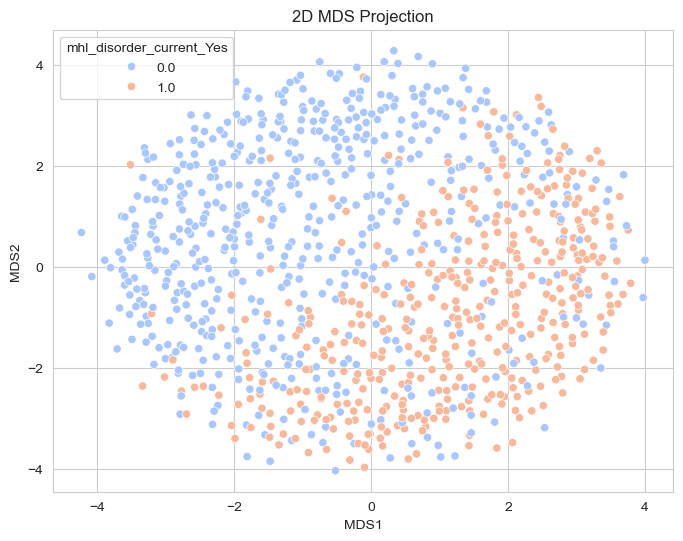

In [25]:
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Separate target and features
y = encoded_df["mhl_disorder_current_Yes"]
X = encoded_df.drop(columns=["mhl_disorder_current_Yes"])

# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply MDS to reduce to 2 dimensions
mds = MDS(n_components=2, random_state=0)
X_2d = mds.fit_transform(X_scaled)

# Create a DataFrame for easier plotting
mds_df = pd.DataFrame(X_2d, columns=["MDS1", "MDS2"])
mds_df["Target"] = y.values

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=mds_df, x="MDS1", y="MDS2", hue="Target", palette="coolwarm")
plt.title("2D MDS Projection")
plt.xlabel("MDS1")
plt.ylabel("MDS2")
plt.legend(title="mhl_disorder_current_Yes")
plt.show()